In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
import tensorflow as tf
import tensorflow_addons as tfa
import random 
random.seed(1234)


In [2]:
train_bodies_path = "fnc-1/train_bodies.csv"
train_headlines_path = "fnc-1/train_stances.csv"

test_bodies_path = "fnc-1/competition_test_bodies.csv"
test_headlines_path= "fnc-1/competition_test_stances.csv"


bodies_df_train = pd.read_csv(train_bodies_path)
stances_df_train = pd.read_csv(train_headlines_path)
df_train = pd.merge(bodies_df_train, stances_df_train, how='right', on='Body ID')

bodies_df_test = pd.read_csv(test_bodies_path)
stances_df_test = pd.read_csv(test_headlines_path)
df_test = pd.merge(bodies_df_test, stances_df_test, how='right', on='Body ID')

In [3]:
ENGLISH_STOP_WORDS = set([
    'a',
    '000', '2014',
    'about',
    'above',
    'across',
    'after',
    'afterwards',
    'again',
    'ain',
    'all',
    'almost',
    'alone',
    'along',
    'already',
    'also',
    'although',
    'always',
    'am',
    'among',
    'amongst',
    'amoungst',
    'amount',
    'an',
    'and',
    'another',
    'any',
    'anyhow',
    'anyone',
    'anything',
    'anyway',
    'anywhere',
    'are',
    'aren',
    'around',
    'as',
    'at',
    'back',
    'be',
    'became',
    'because',
    'become',
    'becomes',
    'becoming',
    'been',
    'before',
    'beforehand',
    'behind',
    'being',
    'below',
    'beside',
    'besides',
    'between',
    'beyond',
    'bill',
    'both',
    'bottom',
    'but',
    'by',
    'call',
    'co',
    'con',
    'could',
    'couldn',
    'couldnt',
    'cry',
    'd',
    'de',
    'describe',
    'detail',
    'did',
    'didn',
    'do',
    'does',
    'doesn',
    'doing',
    'don',
    'done',
    'down',
    'due',
    'during',
    'each',
    'eg',
    'eight',
    'either',
    'eleven',
    'else',
    'elsewhere',
    'empty',
    'enough',
    'etc',
    'even',
    'ever',
    'every',
    'everyone',
    'everything',
    'everywhere',
    'except',
    'few',
    'fifteen',
    'fify',
    'fill',
    'find',
    'fire',
    'first',
    'five',
    'for',
    'former',
    'formerly',
    'forty',
    'found',
    'four',
    'from',
    'front',
    'full',
    'further',
    'get',
    'give',
    'go',
    'had',
    'hadn',
    'has',
    'hasn',
    'hasnt',
    'have',
    'haven',
    'having',
    'he',
    'hence',
    'her',
    'here',
    'hereafter',
    'hereby',
    'herein',
    'hereupon',
    'hers',
    'herself',
    'him',
    'himself',
    'his',
    'how',
    'however',
    'hundred',
    'i',
    'ie',
    'if',
    'in',
    'inc',
    'indeed',
    'interest',
    'into',
    'is',
    'isn',
    'it',
    'its',
    'itself',
    'just',
    'keep',
    'last',
    'latter',
    'latterly',
    'least',
    'less',
    'll',
    'ltd',
    'm',
    'ma',
    'made',
    'many',
    'may',
    'me',
    'meanwhile',
    'might',
    'mightn',
    'mill',
    'mine',
    'more',
    'moreover',
    'most',
    'mostly',
    'move',
    'much',
    'must',
    'mustn',
    'my',
    'myself',
    'name',
    'namely',
    'needn',
    'neither',
    'never',
    'nevertheless',
    'next',
    'nine',
    'no',
    'nobody',
    'none',
    'noone',
    'nor',
    'nothing',
    'now',
    'nowhere',
    'o',
    'of',
    'off',
    'often',
    'on',
    'once',
    'one',
    'only',
    'onto',
    'or',
    'other',
    'others',
    'otherwise',
    'our',
    'ours',
    'ourselves',
    'out',
    'over',
    'own',
    'part',
    'per',
    'perhaps',
    'please',
    'put',
    'rather',
    're',
    's',
    'same',
    'see',
    'seem',
    'seemed',
    'seeming',
    'seems',
    'serious',
    'several',
    'shan',
    'she',
    'should',
    'shouldn',
    'show',
    'side',
    'since',
    'sincere',
    'six',
    'sixty',
    'so',
    'some',
    'somehow',
    'someone',
    'something',
    'sometime',
    'sometimes',
    'somewhere',
    'still',
    'such',
    'system',
    't',
    'take',
    'ten',
    'than',
    'that',
    'the',
    'their',
    'theirs',
    'them',
    'themselves',
    'then',
    'thence',
    'there',
    'thereafter',
    'thereby',
    'therefore',
    'therein',
    'thereupon',
    'these',
    'they',
    'thick',
    'thin',
    'third',
    'this',
    'those',
    'though',
    'three',
    'through',
    'throughout',
    'thru',
    'thus',
    'to',
    'together',
    'too',
    'top',
    'toward',
    'towards',
    'twelve',
    'twenty',
    'two',
    'un',
    'under',
    'until',
    'up',
    'upon',
    'us',
    've',
    'very',
    'via',
    'was',
    'wasn',
    'we',
    'well',
    'were',
    'weren',
    'what',
    'whatever',
    'when',
    'whence',
    'whenever',
    'where',
    'whereafter',
    'whereas',
    'whereby',
    'wherein',
    'whereupon',
    'wherever',
    'whether',
    'which',
    'while',
    'whither',
    'who',
    'whoever',
    'whole',
    'whom',
    'whose',
    'why',
    'will',
    'with',
    'within',
    'without',
    'won',
    'would',
    'wouldn',
    'y',
    'yet',
    'you',
    'your',
    'yours',
    'yourself',
    'yourselves'
])

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

corpus= df_train['articleBody'] + df_train['Headline']

vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS , max_features=5000)
TF_vect_fitted = vectorizer.fit(corpus)

TF_vect_headline_train = TF_vect_fitted.transform(df_train['Headline'])
TF_vect_body_train = TF_vect_fitted.transform(df_train['articleBody'])

TF_vect_headline_test = TF_vect_fitted.transform(df_test['Headline'])
TF_vect_body_test = TF_vect_fitted.transform(df_test['articleBody'])

print(TF_vect_headline_train.shape)
print(TF_vect_body_train.shape)

(49972, 5000)
(49972, 5000)


In [5]:
corpus = []
corpus.extend(bodies_df_train['articleBody'])
corpus.extend(bodies_df_test['articleBody'])

corpus.extend(stances_df_train['Headline'])
corpus.extend(stances_df_test['Headline'])

print(len(corpus))

77972


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS , max_features=5000, norm='l2')
TF_IDF_vect_fitted = vectorizer.fit(corpus)

TF_IDF_vect_headline_train = TF_IDF_vect_fitted.transform(df_train['Headline'])
TF_IDF_vect_body_train = TF_IDF_vect_fitted.transform(df_train['articleBody'])

TF_IDF_vect_headline_test = TF_IDF_vect_fitted.transform(df_test['Headline'])
TF_IDF_vect_body_test = TF_IDF_vect_fitted.transform(df_test['articleBody'])


print(TF_IDF_vect_headline_train.shape)
print(TF_IDF_vect_body_train.shape)

(49972, 5000)
(49972, 5000)


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(TF_IDF_vect_body, TF_IDF_vect_headline):
  cosine_scores = []
  n = TF_IDF_vect_headline.shape[0]
  for i in range(n):
    TFIDF_body, TFIDF_heading = TF_IDF_vect_body[i].toarray(), TF_IDF_vect_headline[i].toarray()
    c = cosine_similarity(TFIDF_body, TFIDF_heading)[0][0]
    cosine_scores.append(c)
  return cosine_scores

cosine_scores_train = get_cosine_similarity(TF_IDF_vect_body_train, TF_IDF_vect_headline_train)
cosine_scores_test = get_cosine_similarity(TF_IDF_vect_body_test, TF_IDF_vect_headline_test)

In [8]:
def get_features(TF_vect_headline_arr, TF_vect_body_arr, cosine_scores):
  features = []
  n = len(cosine_scores)
  for i in tqdm(range(n)):
    f = TF_vect_headline_arr[i].tolist() + [cosine_scores[i]] + TF_vect_body_arr[i].tolist()
    features.append(f)
  return np.array(features)

In [10]:
train_features = get_features(TF_vect_headline_train.toarray(), TF_vect_body_train.toarray(), cosine_scores_train)
test_features = get_features(TF_vect_headline_test.toarray(), TF_vect_body_test.toarray(), cosine_scores_test)

100%|██████████| 25413/25413 [00:05<00:00, 4951.34it/s]


In [11]:
LABELS_MAP = {'agree':0, 'disagree':1, 'discuss':2, 'unrelated':3}
train_labels = np.array(df_train['Stance'])
test_labals = np.array(df_test['Stance'])

train_labels = np.array([LABELS_MAP[x] for x in df_train['Stance']])
test_labals = np.array([LABELS_MAP[x] for x in df_test['Stance']])

In [32]:
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=(10001,), kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation="softmax")
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(global_clipnorm=10),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

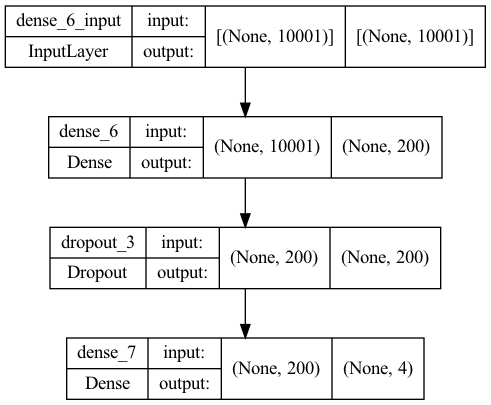

In [27]:
tf.keras.utils.plot_model(model,  show_shapes=True)

In [33]:
history = model.fit(x=train_features, y=train_labels, epochs=200, batch_size=500,
                    validation_data = (test_features,test_labals),
                    verbose=1, use_multiprocessing=True, workers=6,
                                  callbacks=[
                                    tf.keras.callbacks.ModelCheckpoint(
                                        filepath='mymodel.h5',
                                        monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=False,verbose=1
                                    )])

Epoch 1/200


2022-08-01 20:25:39.332102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 0.7800 - accuracy: 0.7565

2022-08-01 20:25:44.097294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.71550, saving model to mymodel.h5
100/100 [==============================] - 6s 52ms/step - loss: 0.7791 - accuracy: 0.7567 - val_loss: 0.9489 - val_accuracy: 0.7155
Epoch 2/200
100/100 [==============================] - ETA: 0s - loss: 0.5820 - accuracy: 0.8202
Epoch 2: val_accuracy improved from 0.71550 to 0.73372, saving model to mymodel.h5
100/100 [==============================] - 4s 39ms/step - loss: 0.5820 - accuracy: 0.8202 - val_loss: 0.8993 - val_accuracy: 0.7337
Epoch 3/200
100/100 [==============================] - ETA: 0s - loss: 0.5129 - accuracy: 0.8524
Epoch 3: val_accuracy did not improve from 0.73372
100/100 [==============================] - 4s 38ms/step - loss: 0.5129 - accuracy: 0.8524 - val_loss: 0.8962 - val_accuracy: 0.7311
Epoch 4/200
100/100 [==============================] - ETA: 0s - loss: 0.4660 - accuracy: 0.8734
Epoch 4: val_accuracy improved from 0.73372 to 0.74922, saving model to mymodel.h5
100/100 [======

In [34]:
model.load_weights("mymodel.h5")

In [35]:
model_predictions = model.predict(test_features)

Int_to_label = {0:'agree', 1:'disagree', 2:'discuss', 3:'unrelated'}
y_pred = [Int_to_label[y] for y in [x.argmax() for x in model_predictions]]
Counter(y_pred)

2022-08-01 20:39:37.867493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Counter({'unrelated': 18549, 'discuss': 4845, 'agree': 2018, 'disagree': 1})

In [17]:
def get_score(y_pred, y_true):
    n = len(y_pred)
    related = ["agree","disagree","discuss"]
    score = 0
    for i in range(n):
        if y_pred[i] == y_true[i]:
            score+=0.25
            if y_true[i]!='unrelated':
                score+=0.50
        if y_pred[i] in related and y_true[i] in related:
            score+=0.25
    print("Model Score:",score)
    return

In [36]:
get_score(y_pred, df_test['Stance'])

Model Score: 8755.5


In [95]:
from utils.score import report_score, LABELS, score_submission
report_score(df_test['Stance'], y_pred)

-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |    635    |     5     |    953    |    310    |
-------------------------------------------------------------
| disagree  |    151    |     4     |    298    |    244    |
-------------------------------------------------------------
|  discuss  |    355    |     3     |   3548    |    558    |
-------------------------------------------------------------
| unrelated |    213    |     0     |   1464    |   16672   |
-------------------------------------------------------------
Score: 8796.25 out of 11651.25	(75.49619139577298%)


75.49619139577298

In [9]:
Counter(df_train['Stance'])


Counter({'unrelated': 36545, 'agree': 3678, 'disagree': 840, 'discuss': 8909})

In [38]:
len(df_test['Stance'])

25413